# Dissolve and Join

# Part 0: Create Population by Continent Image  

Use `dissolve` in the code cell below to create this graph.
![continents](./pop_by_cont.png)

<Axes: >

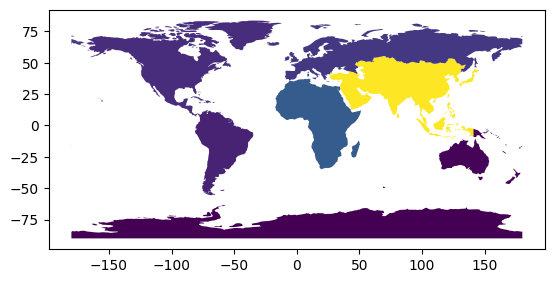

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

gdf = gpd.read_file('ne_110m_admin_0_countries.shp')

# Filter down to just the columns of interest
gdf2 = gdf[["POP_EST", "CONTINENT", "geometry"]]
# Use the dissolve operation: dissolve(by='', aggfunc='')
gdf2 = gdf2.dissolve(by='CONTINENT', aggfunc='sum')
# Then plot the result
gdf2.plot(column="POP_EST")

# Part 1: Use groupby to plot population
We can get close to the above graph (created with a `dissolve`) by using `groupby` first. But, the `groupby` results in a `series` object. We need to add that series back to the GeoDataFrame. The goal would be to get a graph that looks like the following. Note that the country borders are present. 

![continents](./pop_by_country.png)

**But, we have a problem...**   

The `series` won't easily attach. This line of code doesn't work correctly.
```python
gdf['pop'] = pop_series
```

How do you fix this? Complete the code below.

Text(0.5, 1.0, 'The Continents w/ Country Borders')

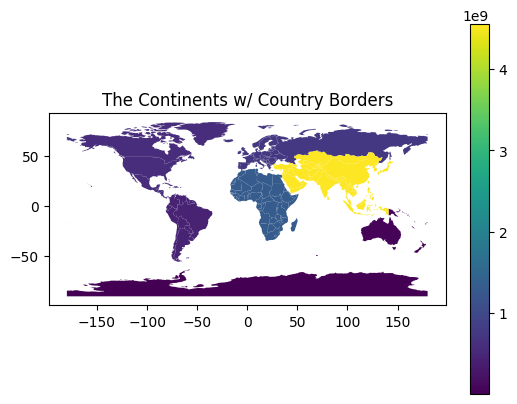

In [5]:
# calculate the sum of each country to get the continent population. Returns a series
pop_series = gdf.groupby('CONTINENT')['POP_EST'].sum()

# add the series to the GeoDataFrame. There is a problem.
# First, understand what the issue is. What does this plot nothing?
# Look at what gdf['pop'] looks like. What happened to the data?
# There is a way to construct what you need. Replace this line of code.
# Hint: create a list, comprehension is useful here.
gdf['pop'] = [pop_series[c] for c in gdf["CONTINENT"]]

# Once solved, we plot the result
gdf.plot(column='pop', legend=True)
plt.title('The Continents w/ Country Borders')



# Part 2A: Exploring Merge 
## Joins
It's time to explore merging dataframes. In the code cell below two datasets are prepared to represent Students and Teachers. You need to practice joining the tables together in various ways.

> Note: You can trim down the columns in a dataset and rename the columns as follows:
```python
# trim to just two columns. Rename 't_name' to 'teacher'
result[['student_name', 't_name']].rename(columns={'t_name': 'teacher'})
```

## Activity
<ol>
    <li>Create the datasets below using multiple joins</li>
    <li>Trim the count of columns and rename them to better names</li>
    <li>Take note of the rows with NaN and when that is better/worse</li>
    <li>Predict which rows will be present before executing the code</li>
</ol>
Datasets: 
<ul>
    <li>Students and their Advisory Teachers</li>
    <li>Teachers with their TAs</li>
</ul>




In [6]:
import pandas as pd

# This just sets up the datasets (aka: tables or dataframes)
st_data = { 'student_name': ['Nikhil', 'Cassie', 'Juliette'],
            'student_id':   [ 1, 2, 3],
            'advisory_teacher_id':  [ 2, 4, 5]}

students = pd.DataFrame(data=st_data)
#display(students)
teacher_data = { 't_name': ['Stride', 'Harrison', 'Olsen', 'Teachout', 'Seeley'],
                 'teacher_id':   [ 1, 2, 3, 4, 5],
                 'ta_id':  [ 1, 3, 4, 0, 1]}
teachers = pd.DataFrame(data=teacher_data)

In [7]:
# create a table of student names with the names of their advisory teacher
combo = students.merge(teachers, left_on='student_id', right_on='ta_id', how='inner')
combo = combo[['student_name','t_name','student_id']]
display(combo)

,student_name,t_name,student_id
0,Nikhil,Stride,1
1,Nikhil,Seeley,1
2,Juliette,Harrison,3


In [8]:
# create a table of Teachers with their TAs
teach_combo = teachers.merge(students, left_on='ta_id', right_on='student_id', how='inner')
teach_combo = teach_combo[['t_name', 'student_name', 'student_id']]
display(teach_combo)

,t_name,student_name,student_id
0,Stride,Nikhil,1
1,Harrison,Juliette,3
2,Seeley,Nikhil,1


# Part 2B: Same thing...
## Join Types
In the code cell below, the datasets are slightly modified so that you can see how the joins work when there are multiple keys in the right dataset. Practice doing all types of joins. 

In [9]:
# to see a left join with a repetition, let's change the data a bit
# create a TA_GROUP and students belong to the TA_GROUP
st_data = { 'student_name': ['Nikhil', 'Cassie', 'Juliette'],
            'student_id':   [ 1, 2, 3],
            'advisory_id':  [ 2, 4, 5],
            'ta_group_id':  [ 1, 2, 1]}
students = pd.DataFrame(data=st_data)

teacher_data = { 't_name': ['Stride', 'Harrison', 'Olsen', 'Teachout', 'Seeley'],
                 't_id':   [ 1, 2, 3, 4, 5],
                 'ta_id':  [ 1, 3, 4, 2, 1]}
teachers = pd.DataFrame(data=teacher_data)


In [16]:
# join the tables together again and note the results
join = teachers.merge(students, left_on = "ta_id", right_on = "student_id", how = "inner")
join = join[["ta_group_id", "student_name"]]
join = join.drop_duplicates(subset="student_name", keep="first")
display(join)

,ta_group_id,student_name
0,1,Nikhil
1,1,Juliette
2,2,Cassie


# Part 3: Use Join after groupby
## Join Types
Above we did a `groupby` to get a series object and then added it to the GeoDataFrame before plotting it. In order to add it, we created a `list` of the correct length with the correct data. But now we have more tools available to us. We can do a `merge` (join) to add the series to the GeoDataFrame.  

Complete the code below to generate the same graph as above.
> ERROR: The merge works great. ARRG!! The plot fails. Yes, I set you up for this failure. But, you are now tasked to fix it. First, try to understand the error. Investigate by printing stuff. Then, implement your favorite fix... there are at least 3.

Text(0.5, 1.0, 'The Continents w/ Country Borders')

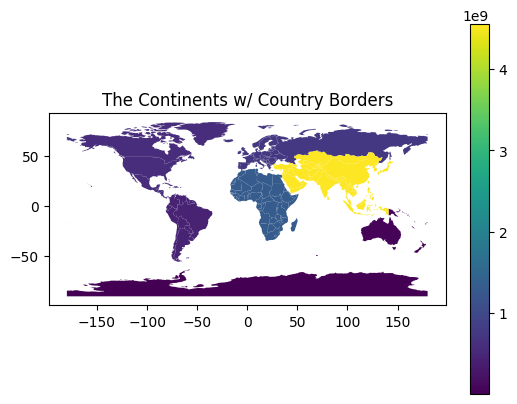

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

gdf = gpd.read_file('ne_110m_admin_0_countries.shp')

# get a series that groups by the population
# calculate the sum of each continent. Returns a series with 7 rows (1 per continent)
pop_series = gdf.groupby('CONTINENT')['POP_EST'].sum()

# Filter down to just the columns of interest since merge works on all columns
populations = gdf[['POP_EST', 'CONTINENT','NAME', 'geometry']]

# Do a join to generate a new dataframe 
final = populations.merge(pop_series, on = "CONTINENT")
#display(final)
# Then plot the result
final.plot(column='POP_EST_y', legend=True)
plt.title('The Continents w/ Country Borders')


# Part 4: Affected States
## Hurricane Florence - sjoin
For Hurricane Florence, a plot of the affected states is drawn. Run the code cell below to see what it looks like.

## Activity : Understand and Explain
All of the code is provided for you in the Code Cell below. Answer the following questions:  

**Question #1A**: When creating the `affected_states` why is `inner` the correct join? Explain why `left` and `right` are incorrect.
> Inner is the correct join because we are trying to find the intersection between all the states, and the places that were affected by Hurricane Florence. Left and right are incorrect as they would just get one or the other, not the intersection. 

**Question #1B**: How many rows are in the dataset `affected_states`? Is there any benefit to reducing the dataset so that each state appears only once? Can you figure out a way to do this correctly?
> There are 25 rows in the "affected_states" dataset. The benefit to reduction is that there are no redundant states, which makes the table easier to read. I have dropped the duplicate values by calling the method .drop_duplicates()

**Question #2**: Why is it necessary to create a figure with the API `subplots`? 
> It is necessary to use 'subplots' as it is a matplotlib function, and it allows for greater customization. Since this figure has many features layered on, it is important for every detail to be clear.

**Question #3**: What is the purpose of plotting the country with `color='#EEEEEE'`?
> Plotting country with a gray color makes it easier to see the full picture. Since there is a contrast between the country and the affected states, the information is more clear. 

**Question #4**: What happens when you reverse the order of these two plots? Why does that happen?
> Reversing the order of the two plots causes the data from Florence to be hidden behind the states. This happens because the order of each plot matters for the visibility of the data.

<Axes: >

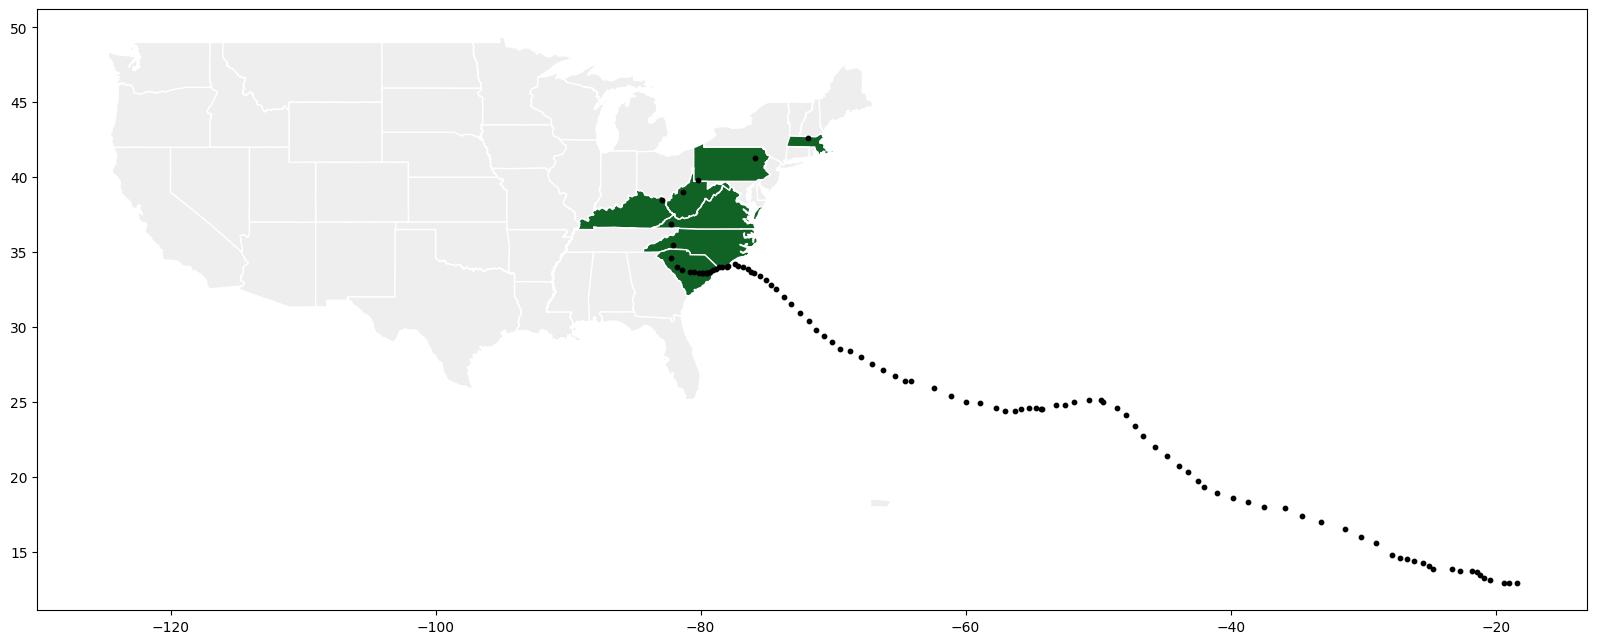

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

# Load in US Data
country = gpd.read_file("gz_2010_us_040_00_5m.json")
country = country[(country['NAME'] != 'Alaska') & (country['NAME'] != 'Hawaii')]

# Load in Florence data
florence = pd.read_csv('stormhistory.csv')
florence['coordinates'] = [Point(-long, lat) for long, lat in 
                           zip(florence['Long'], florence['Lat'])]
florence = gpd.GeoDataFrame(florence, geometry='coordinates')
# Advanced: Need to specify map projection points so we can join them later
florence.crs = country.crs 
#display(florence)

# Do a Spatial Join on the two datasets
# It is a static method in the GeoPandas module
# Code related to questions #1A and #1B:
affected_states = gpd.sjoin(country, florence, how='inner', predicate='intersects')
affected_states = affected_states.drop_duplicates(subset="NAME", keep="first")
#print(len(affected_states))
#display(affected_states)

# Code related to question #2:
fig, ax = plt.subplots(1, figsize=(20, 10))

# Code related to question #3
country.plot(ax=ax, color='#EEEEEE', edgecolor='#FFFFFF')

# Code related to question #4
affected_states.plot(ax=ax, color="#106325", edgecolor='#FFFFFF')
florence.plot(ax=ax, color='#000000', markersize=10)